In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

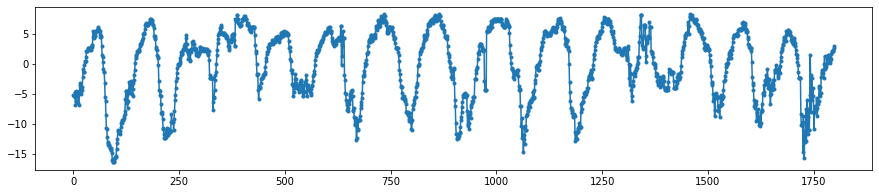

In [2]:
x = np.loadtxt('hr2.txt')
x = x-np.mean(x)
n = x.shape[0]
t = np.arange(n)
# t = np.linspace(0,10,n)
# x = 10*np.cos(2*np.pi*0.5*t) - 5*np.sin(2*np.pi*1.0*t)
plt.figure(figsize=(15,3))
plt.plot(t,x, '.-')

# Observations

In [3]:
np.random.seed(39)
n_obs = np.ceil(0.1*n).astype('int')
time_index_obs = np.sort(np.random.choice(np.arange(int(n)), size=n_obs, replace=False))
t_obs = t[time_index_obs]
x_obs = x[time_index_obs]
sigma_noise = 5e-1
x_obs = x_obs + sigma_noise*np.random.randn(n_obs)

# BRFP

In [4]:
from BRFP.functions import *

In [5]:
brfp = BRFP(t)
brfp.train(x_obs,t_obs)

Condicion inicial optimizador:  [2.  0.1 1. ]
['Derivatives: ', -1282.3471400882638, 41.20261018611275, -443.70819134887626]
['Derivatives: ', -12.29747281137218, 2.970794055867603, -10.651835565927897]
['Derivatives: ', -6.036746991472553, 2.915374147067071, -10.022940441368423]
['Derivatives: ', 8.131970054882636, 2.918117183969634, -9.008085854863355]
['Derivatives: ', 20.100207292129156, 3.147252831600368, -8.717268653442051]
['Derivatives: ', 68.72297858065374, 5.130757132190244, -5.7683448812733715]
['Derivatives: ', 110.35720492605007, 8.560517725842708, 12.595550622227908]
['Derivatives: ', 88.95322785030824, 6.695051950174207, -0.6899878756258931]
['Derivatives: ', 115.01577917660543, 11.397887915719888, 28.768861741644486]
['Derivatives: ', 97.60212389226038, 13.08853719727695, 14.885396323615621]
['Derivatives: ', 49.835198604018366, 46.323909431525344, 129.4836167240432]
['Derivatives: ', -184.11857360549067, 7.63590889471519, 9.290536115397602]
['Derivatives: ', 21.3157706

True

In [6]:
res = brfp.predict()

Computing BRFP covariances matrixes...done.


In [7]:
xmodel, xmodel_var, Xmodel, Xmodel_var, w = res['x'], res['x_var'], res['X'], res['X_var'], res['w']

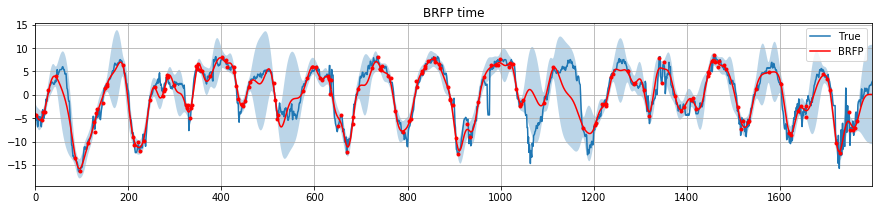

In [8]:
plt.figure(figsize=(15,3))
plt.plot(t,x, label='True')
plt.plot(t,xmodel,'r', label='BRFP')
plt.fill_between(t, (xmodel + 2* np.sqrt(xmodel_var)), (xmodel - 2* np.sqrt(xmodel_var)), alpha=0.3)
plt.plot(t_obs, x_obs, 'r.')
plt.xlim(t[0],t[-1])
plt.grid()
plt.title('BRFP time')
plt.legend()


Text(0.5, 1.0, 'Imag BRFP spectrum')

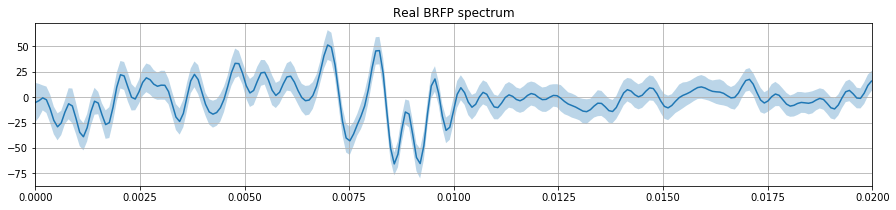

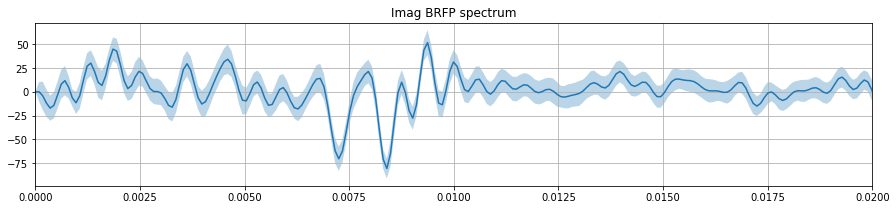

In [9]:
plt.figure(figsize=(15,3))
plt.plot(w, Xmodel.real)
plt.fill_between(brfp.w, (Xmodel.real + 2* np.sqrt(Xmodel_var.real)), (Xmodel.real - 2* np.sqrt(Xmodel_var.real)), alpha=0.3)
plt.xlim(0, 0.02)
plt.grid()
plt.title('Real BRFP spectrum')

plt.figure(figsize=(15,3))
plt.plot(w, Xmodel.imag)
plt.fill_between(brfp.w, (Xmodel.imag + 2* np.sqrt(Xmodel_var.imag)), (Xmodel.imag - 2* np.sqrt(Xmodel_var.imag)), alpha=0.3)
plt.xlim(0, 0.02)
plt.grid()
plt.title('Imag BRFP spectrum')